In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.describe(include='object')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
cat=[col for col in df.columns if df[col].dtype==object]
numeric=[col for col in df.columns if df[col].dtype!=object]

In [13]:
cat,numeric

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['math_score', 'reading_score', 'writing_score'])

In [14]:
unique=[df[col].unique() for col in cat ]
unique

[array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object)]

In [15]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3


In [16]:
print(len(df[df['math_score']==100]))

7


Text(0.5, 1.0, 'Average marks of female while lunch facility provided')

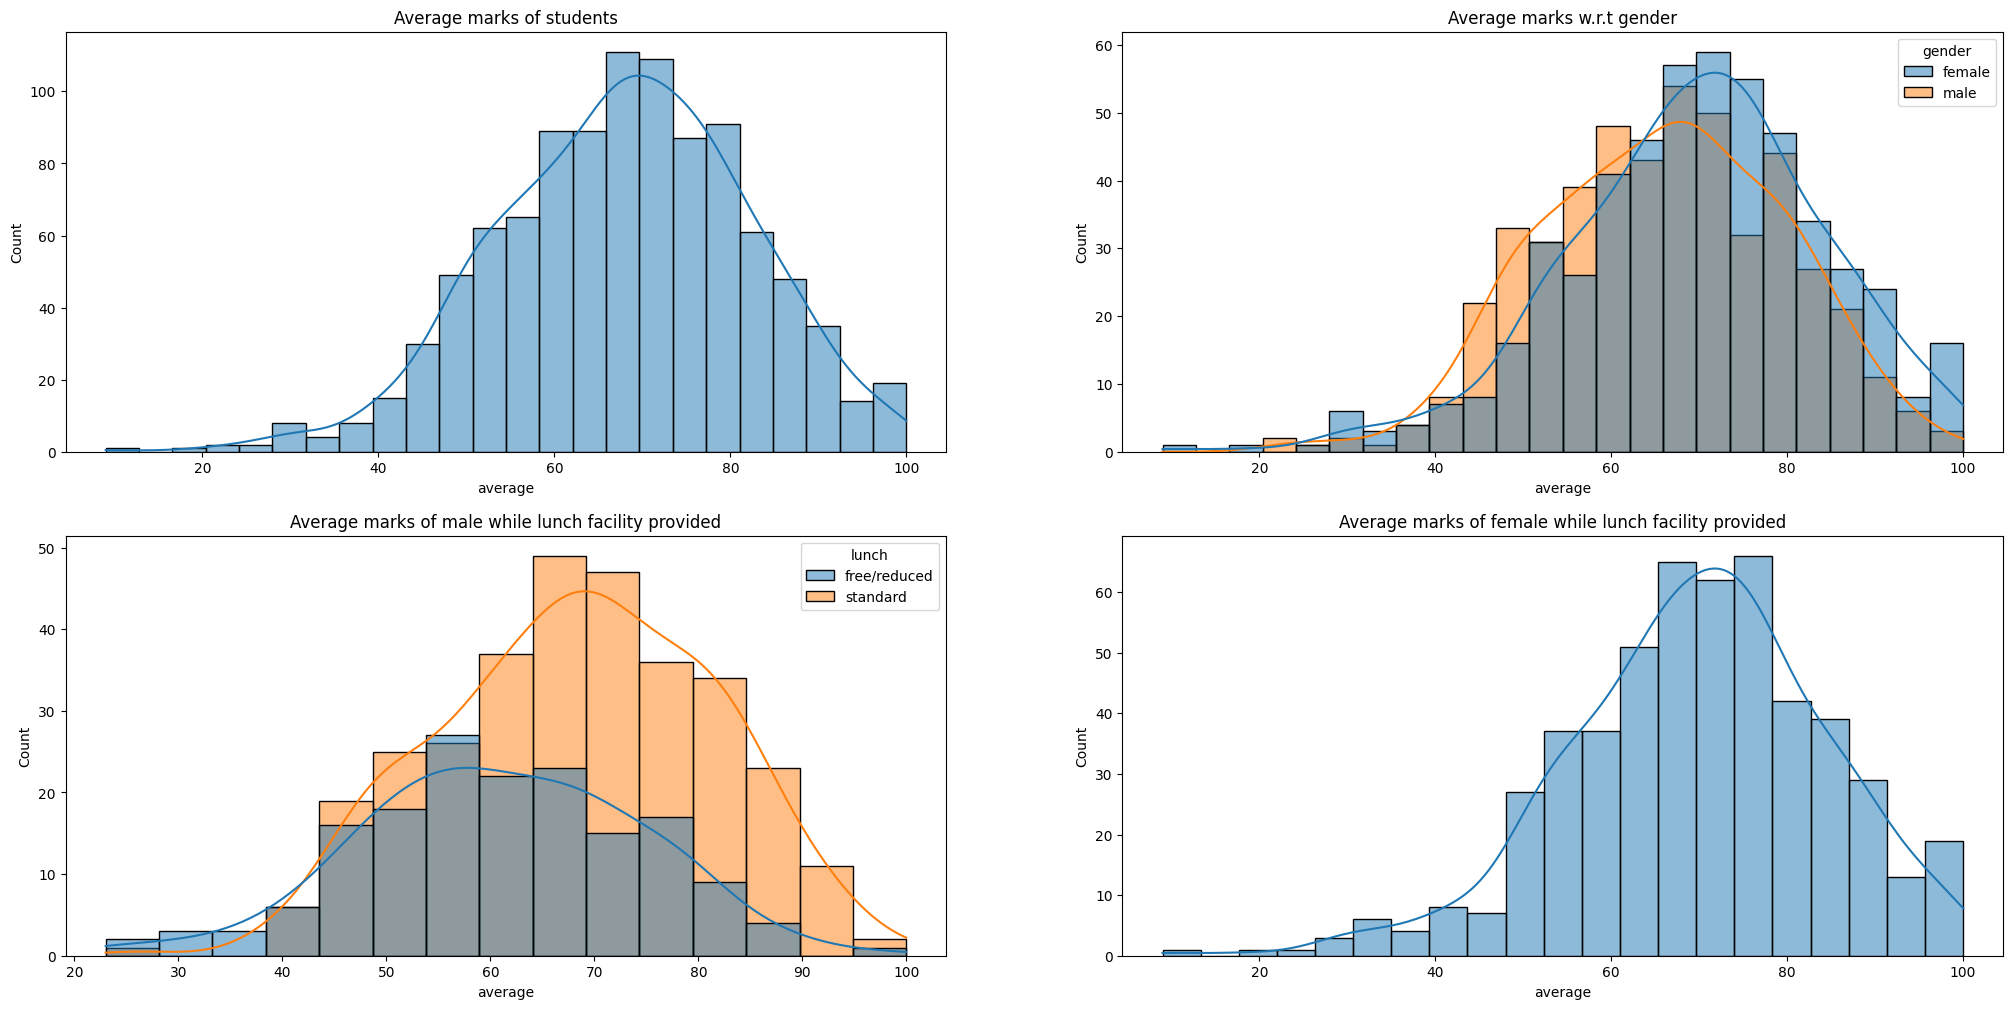

In [17]:
fig,axs=plt.subplots(2,2,figsize=(25,12))
sns.histplot(data=df,x='average',kde=True,ax=axs[0,0])
axs[0,0].set_title('Average marks of students')
sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[0,1])
axs[0,1].set_title('Average marks w.r.t gender')
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True,ax=axs[1,0])
axs[1,0].set_title('Average marks of male while lunch facility provided')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,ax=axs[1,1])
axs[1,1].set_title('Average marks of female while lunch facility provided')


# Model Building

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [19]:
X=df.drop(columns=['math_score'],axis=1)
Y=df['math_score']

In [31]:
X.shape,Y.shape

((1000, 21), (1000,))

In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
num_f=X.select_dtypes(exclude="object").columns
cat_f=X.select_dtypes(include="object").columns

In [22]:
sc=StandardScaler()
oh=OneHotEncoder()
preprocessor=ColumnTransformer(
    [   
        ("OneHotEncoder",oh,cat_f),
        ("Standardscaler",sc,num_f)
    ]
)

In [23]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('Standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [24]:
X=preprocessor.fit_transform(X)

In [25]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]], shape=(1000, 21))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 21), (200, 21))

In [32]:
def evaluate_model(true,pred):
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mean_squared_error(true,pred))
    mae=mean_absolute_error(true,pred)
    r2=r2_score(true,pred)
    return rmse,mae,r2

In [46]:
models={
    "LinearRegression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "svr":SVR(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "XGB":XGBRegressor(),
    "catboost":CatBoostRegressor()
}
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    rmse_train,mae_train,r2_train=evaluate_model(y_train,y_train_pred)
    rmse_test,mae_test,r2_test=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    r2_list.append(r2_test)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


ridge
Model performance for Training set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


lasso
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


svr
Model performance for Training set
- Root Mean Squared Error: 5.1398
- Mean Absolute Error: 3.5074
- R2 Score: 0.8828
----------------------------------
Model p

In [47]:
model_list=list(models.keys())

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,1.000000
1,ridge,0.999516
7,XGB,0.977101
8,catboost,0.968100
5,RF,0.965007
4,DT,0.940001
6,AdaBoost,0.927661
2,lasso,0.908560
3,svr,0.794023


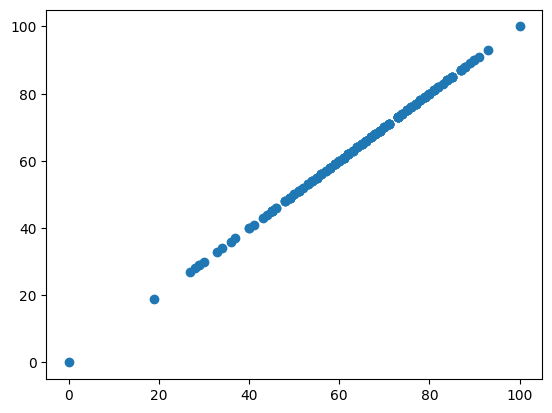

In [51]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
plt.scatter(y_test,y_pred)